## PROJECT TITLE: **LOAN PERFORMANCE & RECOVERY ANALYTICS**

### **PROJECT OVERVIEW**

This notebook provides an in-depth analysis of Non-Performing Loans (NPLs) and revenue collection trends from the SOS_Buka project conducted in the DRC by Vodacom from August 2023 to August 2024. It examines key metrics such as the NPL ratio, aging of loans, repayment/collection patterns, and revenue performance to inform risk management and guide recovery strategies.

### **OBJECTIVE**


#### **1. Primary Objective**
The primary objective of this data analysis task is to comprehensively assess the performance of Non-Performing Loans (NPLs) and revenue collection trends. By analyzing these financial metrics, I aim to provide insights that can guide decision-making in loan management, collection strategies, and overall financial health monitoring.


#### **2. Key Analysis Areas**

**a) NPL Ratio Analysis**
- **Objective:** To calculate the overall Non-Performing Loan (NPL) ratio and track the monthly trend in NPLs.
- **Description:** The NPL ratio is a critical indicator of the financial health of a lending institution, reflecting the percentage of loans that are in default or close to being in default. This analysis will involve calculating the NPL ratio at an aggregate level, as well as monitoring how this ratio evolves month-over-month.

**b) Aging Analysis**
- **Objective:** To conduct an aging analysis of loans, categorizing them into different aging buckets (0-30, 31-60, 61-90, >90 days past due) and tracking monthly shifts within these categories.
- **Description:** Aging analysis helps in identifying the distribution of overdue loans and the potential risk they pose to the financial institution. The analysis will provide an overall view as well as a monthly breakdown of the number and value of loans falling into each aging bucket, highlighting shifts in the aging profile over time.

**c) Repayment/Collection Trend Analysis**
- **Objective:** To evaluate the trend in loan repayments and collections over time.
- **Description:** This analysis will track the repayment patterns of borrowers and identify trends in loan collections. By assessing this data, we can understand borrower behavior, the effectiveness of collection strategies, and areas that may need intervention.

**d) Revenue Collection Trend Analysis**
- **Objective:** To analyze the trend in revenue collection from loans over time.
- **Description:** This will involve tracking revenue collection (interest and principal) trends on a monthly basis. The goal is to understand how revenue collection varies over time and to identify any patterns or anomalies that could impact overall financial performance.

#### **3. Data Features**
-**loan_id:** Unique identifier for the loan.

-**agent_id:** Identifier for the agent handling the loan.

-**loan_amount:** The total amount of the loan.

-**loan_balance:** The remaining balance of the loan.

-**amount_paid:** The total amount paid back so far.

-**outstanding_principle:** The remaining principal amount that has not been paid.

-**outstanding_daily_interest:** The daily interest that has not been paid.

-**outstanding_setup_fees:** The setup fees that have not been paid.

-**outstanding_penalty_fees:** The penalty fees that have not been paid.

-**interest_earned:** The interest earned on the loan.

-**penalty_fees_repayment:** The penalty fees that have been repaid.

-**daily_interest_repayment:** The daily interest that has been repaid.

-**status_id:** Status of the loan.

-**defaulted:** Indicates if the loan has defaulted.

-**eligible_amount:** The amount eligible for repayment.

-**created_at:** The date the loan was created.

-**due_date:** The due date for the loan repayment.

-**last_repayment_date:** The date of the last repayment.

-**days_interest_calculated:** The number of days interest has been calculated.

-**age:** The age of the loan in days.

#### **4. Methodology**
- **Data Cleaning & Preparation:** Data will be cleaned and prepared for analysis, ensuring accuracy and consistency across all data points.
- **Descriptive Analysis:** Perform descriptive statistics to understand the distribution and central tendencies of the data.
- **Trend Analysis:** Utilize time-series analysis to observe trends and patterns over time.
- **Aging Categorization:** Loans will be categorized into aging buckets based on the number of days past due.
- **Visualization:** Graphical representations (line charts, bar graphs, etc.) will be created to clearly present the trends and findings.

#### **5. Expected Outcomes**
- A clear understanding of the overall NPL ratio and its monthly trend, highlighting potential areas of concern.
- Insight into the aging distribution of loans, showing shifts in loan performance and risk exposure over time.
- A detailed view of repayment/collection trends, assisting in evaluating the effectiveness of current strategies.
- Analysis of revenue collection trends to assess financial performance and identify potential revenue shortfalls or gains.

## DATA UNDERSTANDING

### File Parsing

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensures plots are generated within the notebook
%matplotlib inline

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Read the file into the working environment. (NB: You can change filepath as needed when working on the dataset)
filepath = 'C:/Users/Hp/Documents/WORK/TURBO GROUP/Turbo - Created at vs Collection Date Report (Aug2023 - Aug2024) RAW DATA.xlsx'
df = pd.read_excel(filepath, parse_dates=True, date_format='%d/%b/%Y')

### Data Wrangling

In [5]:
# Obtain metadata regarding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288446 entries, 0 to 288445
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_id                     288446 non-null  object 
 1   agent_id                    288446 non-null  int64  
 2   loan_amount                 288446 non-null  int64  
 3   loan_balance                288446 non-null  float64
 4   amount_paid                 288446 non-null  float64
 5   outstanding_principle       288446 non-null  float64
 6   outstanding_daily_interest  288446 non-null  float64
 7   outstanding_setup_fees      288446 non-null  float64
 8   outstanding_penalty_fees    288446 non-null  float64
 9   interest_earned             288446 non-null  float64
 10  principle_repayment         269785 non-null  float64
 11  setup_fees_repayment        269785 non-null  float64
 12  daily_interest_repayment    269785 non-null  float64
 13  penalty_fees_r

In [6]:
# Visually inspect the dataframe by returning the first few rows
df.head()

,loan_id,agent_id,loan_amount,loan_balance,amount_paid,outstanding_principle,outstanding_daily_interest,outstanding_setup_fees,outstanding_penalty_fees,interest_earned,...,daily_interest_repayment,penalty_fees_repayment,status_id,defaulted,eligible_amount,created_at,due_date,last_repayment_date,days_interest_calculated,age
0,37c8a45dbbcf8e09189064ea4457adb0,201000000000330093,10000,0.0,10263.28,0.0,0.0,0.0,0.0,263.28,...,13.28,0.0,2,0,50000.00,45149.789352,NaN,45155.946597,6,6
1,975d6d720f528cf94f523d6ba1d5c111,201000000000565864,3357,0.0,3440.93,0.0,0.0,0.0,0.0,83.93,...,0.00,0.0,2,0,50000.00,45150.289144,NaN,45150.363981,0,0
2,6cb7205ddab12cc7c8cb1d7df1c6ce86,201000000000624896,17450,0.0,17886.25,0.0,0.0,0.0,0.0,436.25,...,0.00,0.0,2,0,116120.51,45150.382905,NaN,45150.468808,0,0
3,c9138fc7078f254aeea92f1d17807bd2,201000000000330093,30000,0.0,32318.56,0.0,0.0,0.0,0.0,2318.56,...,1568.56,0.0,2,0,50000.00,45150.405532,NaN,45155.946597,5,5
4,35b052df405c78add3a3c152ecbaeeff,201000000000527285,1930,0.0,2038.19,0.0,0.0,0.0,0.0,108.19,...,59.94,0.0,2,0,149670.00,45150.406528,NaN,45153.701794,3,3


In [7]:
# Function to convert Excel date format to datetime  NB: This cell may take time to execute
def excel_date_to_datetime(excel_date):
    if isinstance(excel_date, str):
        return pd.to_datetime(excel_date, format='%d/%b/%Y') # Use %b for abbreviated month names
    else:
        return pd.to_datetime('1899-12-30') + pd.to_timedelta(excel_date, 'D') # Handle numeric dates

# Convert date columns from numeric format to datetime and format them as dd/mm/yyyy
date_columns = ['created_at', 'due_date', 'last_repayment_date']

for col in date_columns:
    df[col] = df[col].apply(excel_date_to_datetime).dt.strftime('%d/%m/%Y')

# Display the first few rows to verify the changes
df[date_columns].head()

,created_at,due_date,last_repayment_date
0,11/08/2023,NaN,17/08/2023
1,12/08/2023,NaN,12/08/2023
2,12/08/2023,NaN,12/08/2023
3,12/08/2023,NaN,17/08/2023
4,12/08/2023,NaN,15/08/2023


In [8]:
# Ensuring the converted columns have enough values to analyse
df[date_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288446 entries, 0 to 288445
Data columns (total 3 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   created_at           288446 non-null  object
 1   due_date             203590 non-null  object
 2   last_repayment_date  288446 non-null  object
dtypes: object(3)
memory usage: 6.6+ MB


In [9]:
# Obtain metadata to ensure the datatype modifications have been exected
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288446 entries, 0 to 288445
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_id                     288446 non-null  object 
 1   agent_id                    288446 non-null  int64  
 2   loan_amount                 288446 non-null  int64  
 3   loan_balance                288446 non-null  float64
 4   amount_paid                 288446 non-null  float64
 5   outstanding_principle       288446 non-null  float64
 6   outstanding_daily_interest  288446 non-null  float64
 7   outstanding_setup_fees      288446 non-null  float64
 8   outstanding_penalty_fees    288446 non-null  float64
 9   interest_earned             288446 non-null  float64
 10  principle_repayment         269785 non-null  float64
 11  setup_fees_repayment        269785 non-null  float64
 12  daily_interest_repayment    269785 non-null  float64
 13  penalty_fees_r

In [10]:
# Since the datetime conversion was successful, we can sample the dataset for visual inpection
df.sample(10, random_state=42)

,loan_id,agent_id,loan_amount,loan_balance,amount_paid,outstanding_principle,outstanding_daily_interest,outstanding_setup_fees,outstanding_penalty_fees,interest_earned,...,daily_interest_repayment,penalty_fees_repayment,status_id,defaulted,eligible_amount,created_at,due_date,last_repayment_date,days_interest_calculated,age
23474,b3ce91fc402c12b906bb281c5c58507f,201000000000491294,6000,0.00,6030.00,0.0,0.00,0.00,0.00,30.00,...,0.00,0.0,2,0,50000.00,28/09/2023,NaN,28/09/2023,0,0
42631,ba984c7af699fa5cb8a99fa594831bf1,201000000000365521,21043,0.00,21148.22,0.0,0.00,0.00,0.00,105.22,...,0.00,0.0,2,0,384754.01,27/10/2023,NaN,28/10/2023,0,1
22663,006be45872682c50a031e78f228e5a10,201000000000359387,1350,0.00,1356.75,0.0,0.00,0.00,0.00,6.75,...,0.00,0.0,2,0,371581.01,27/09/2023,NaN,27/09/2023,0,0
166172,43fa8e2d74d942ec47a0e3a70cf39f82,201000000000567053,5000,0.00,5124.36,0.0,0.00,0.64,0.00,124.36,...,0.00,0.0,2,0,50000.00,29/04/2024,06/05/2024,08/05/2024,7,9
1499,867af5aa4a4ae7525afac07ffe445a0f,201000000000742703,8850,0.00,8947.72,0.0,0.00,0.00,0.00,97.72,...,53.47,0.0,2,0,55638.50,21/08/2023,NaN,25/08/2023,3,4
149455,99b4c6417c08b35759d8ebed19768a6c,201000000000493361,6223,0.24,6507.00,0.0,0.22,0.00,0.02,284.00,...,128.00,0.0,2,1,50000.00,31/03/2024,07/04/2024,10/04/2024,31,10
9245,40a4706d527493a69c9d1670e2167225,201000000000536451,16084,0.00,16164.42,0.0,0.00,0.00,0.00,80.42,...,0.00,0.0,2,0,323083.99,08/09/2023,NaN,08/09/2023,0,0
246914,e2c567b8eca6a2f9c3d71bb5e7ee7124,201000000000806250,9000,0.00,9989.00,0.0,0.00,0.00,0.00,989.00,...,764.00,0.0,2,0,51817.12,04/07/2024,11/07/2024,13/07/2024,8,9
91839,7108b379aaed0007f2b295c69b624376,201000000000592072,8500,0.00,9307.50,0.0,0.00,0.00,0.00,807.50,...,595.00,0.0,2,0,50000.00,02/01/2024,09/01/2024,09/01/2024,7,7
217049,0fc355d48a531ac28209bd77f6f2b6c6,201000000000742400,35000,38681.00,14035.00,20965.0,12370.00,875.00,4471.00,0.00,...,0.00,0.0,1,1,50000.00,10/06/2024,17/06/2024,31/07/2024,31,57


In [11]:
# Inspect the dataset for duplicate records

# Identify and display duplicate rows
duplicates = df[df.index.duplicated()]
print("Duplicate rows:")
print(duplicates)

Duplicate rows:
Empty DataFrame
Columns: [loan_id, agent_id, loan_amount, loan_balance, amount_paid, outstanding_principle, outstanding_daily_interest, outstanding_setup_fees, outstanding_penalty_fees, interest_earned, principle_repayment, setup_fees_repayment, daily_interest_repayment, penalty_fees_repayment, status_id, defaulted, eligible_amount, created_at, due_date, last_repayment_date, days_interest_calculated, age]
Index: []

[0 rows x 22 columns]


Since the data has no duplicates and has sufficiently been cleaned, we progress to the next stage of analyzing the data for insights.

## DATA ANALYSIS

### Feature Engineering

At this juncture, we engineer some new features from the existing columns that will help us analyse the dataframe more comprehensively.

In [12]:
# NPL Status
df['is_npl'] = df['defaulted'].astype(int)

In [13]:
df[date_columns].head()

,created_at,due_date,last_repayment_date
0,11/08/2023,NaN,17/08/2023
1,12/08/2023,NaN,12/08/2023
2,12/08/2023,NaN,12/08/2023
3,12/08/2023,NaN,17/08/2023
4,12/08/2023,NaN,15/08/2023


In [14]:
# Convert the date columns to datetime objects
# (replace 'date_columns' with the actual list of your date columns)
for col in ['created_at', 'due_date', 'last_repayment_date']:
    df[col] = pd.to_datetime(df[col], errors='coerce', format='mixed')

df[date_columns].head()

,created_at,due_date,last_repayment_date
0,2023-11-08,NaT,2023-08-17
1,2023-12-08,NaT,2023-12-08
2,2023-12-08,NaT,2023-12-08
3,2023-12-08,NaT,2023-08-17
4,2023-12-08,NaT,2023-08-15


In [15]:
# Inspect date columns to ensure conversion to datetime was successful
df[date_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288446 entries, 0 to 288445
Data columns (total 3 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   created_at           288446 non-null  datetime64[ns]
 1   due_date             203590 non-null  datetime64[ns]
 2   last_repayment_date  288446 non-null  datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 6.6 MB


In [16]:
# Create month/year columns from respective datetime columns
df['created_month'] = df['created_at'].dt.to_period('M')
df['due_month'] = df['due_date'].dt.to_period('M')
df['last_repayment_month'] = df['last_repayment_date'].dt.to_period('M')

###### NB: 

Rememer to re-calculate 'days_since_last_repayment' and 'days_past_due' using the following timestamp : 6/8/2024  12:00:00 AM

Refer to Clustering notebook

In [17]:
# Compute the number of days since the last repayment.
df['days_since_last_repayment'] = (pd.Timestamp.now() - df['last_repayment_date']).dt.days
df['days_since_last_repayment'] = df['days_since_last_repayment'].apply(lambda x: max(x, 0))

In [18]:
# Compute the number of days past the due date if the loan is overdue.
df['days_past_due'] = (pd.Timestamp.now() - df['due_date']).dt.days
df['days_past_due'] = df['days_past_due'].apply(lambda x: max(x, 0))

In [19]:
# Aging buckets
def categorize_age(days_past_due):
    if days_past_due <= 30:
        return '0-30'
    elif days_past_due <= 60:
        return '31-60'
    elif days_past_due <= 90:
        return '61-90'
    else:
        return '>90'

df['aging_bucket'] = df['days_past_due'].apply(categorize_age)


In [20]:
# Collection (Repayment) rate
df['collection_rate'] = (df['amount_paid'] / (df['eligible_amount'] + 1e-6)) * 100  # Adding a small value to avoid division by zero

In [21]:
# Revenue Earned
df['revenue_earned'] = df['interest_earned'] + df['penalty_fees_repayment'] + df['daily_interest_repayment']


In [22]:
# Outstanding Revenue
df['outstanding_revenue'] = df['outstanding_principle'] + df['outstanding_daily_interest'] + df['outstanding_setup_fees'] + df['outstanding_penalty_fees']


In [23]:
# Revenue per Loan
df['revenue_per_loan'] = (df['interest_earned'] + df['penalty_fees_repayment'] + df['daily_interest_repayment']) / df['loan_amount']

In [24]:
df.columns

Index(['loan_id', 'agent_id', 'loan_amount', 'loan_balance', 'amount_paid',
       'outstanding_principle', 'outstanding_daily_interest',
       'outstanding_setup_fees', 'outstanding_penalty_fees', 'interest_earned',
       'principle_repayment', 'setup_fees_repayment',
       'daily_interest_repayment', 'penalty_fees_repayment', 'status_id',
       'defaulted', 'eligible_amount', 'created_at', 'due_date',
       'last_repayment_date', 'days_interest_calculated', 'age', 'is_npl',
       'created_month', 'due_month', 'last_repayment_month',
       'days_since_last_repayment', 'days_past_due', 'aging_bucket',
       'collection_rate', 'revenue_earned', 'outstanding_revenue',
       'revenue_per_loan'],
      dtype='object')

In [25]:
# Export the new DataFrame to a separate excel sheet for modelliing purposes
df.to_excel('output.xlsx', index=False)  # index=False prevents saving the index as a separate column

### Data Visualization

#### NPL Analysis

In [26]:
# Set the plot style for better aesthetics
sns.set_style('whitegrid')

In [27]:
# Calculate the NPL ratio
npl_ratio = df['defaulted'].mean()

# Display the NPL ratio
print(f"Overall NPL Ratio: {npl_ratio:.2%}")

Overall NPL Ratio: 5.24%


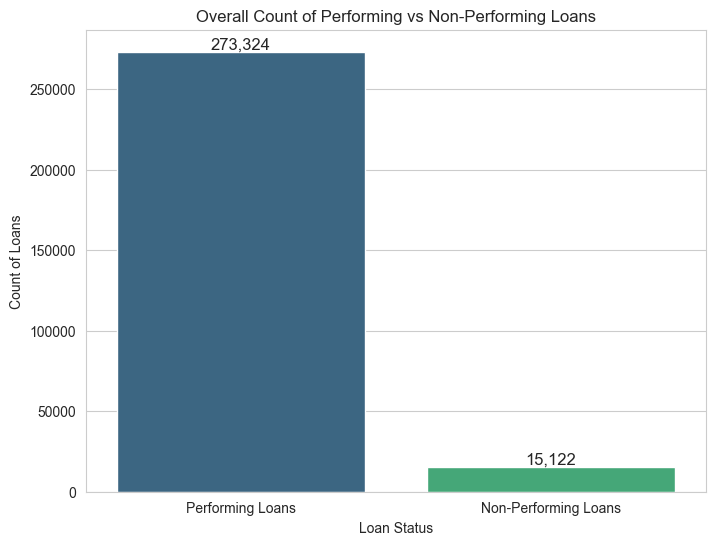

In [28]:
# Count of Performing and Non-Performing Loans
loan_status_counts = df['is_npl'].value_counts()

# Mapping 0 to "Performing Loans" and 1 to "Non-Performing Loans"
loan_status_counts.index = ['Performing Loans', 'Non-Performing Loans']

# Plotting the overall count of Performing and Non-Performing Loans
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=loan_status_counts.index, y=loan_status_counts.values, palette='viridis', legend='auto')

# Annotating the counts on top of the bars
for i, value in enumerate(loan_status_counts.values):
    ax.text(i, value + 0.5, f'{value:,}', ha='center', va='bottom', fontsize=12)

# Adding labels and title
plt.title('Overall Count of Performing vs Non-Performing Loans')
plt.xlabel('Loan Status')
plt.ylabel('Count of Loans')
plt.show()
#plt.savefig('overall npl counts')

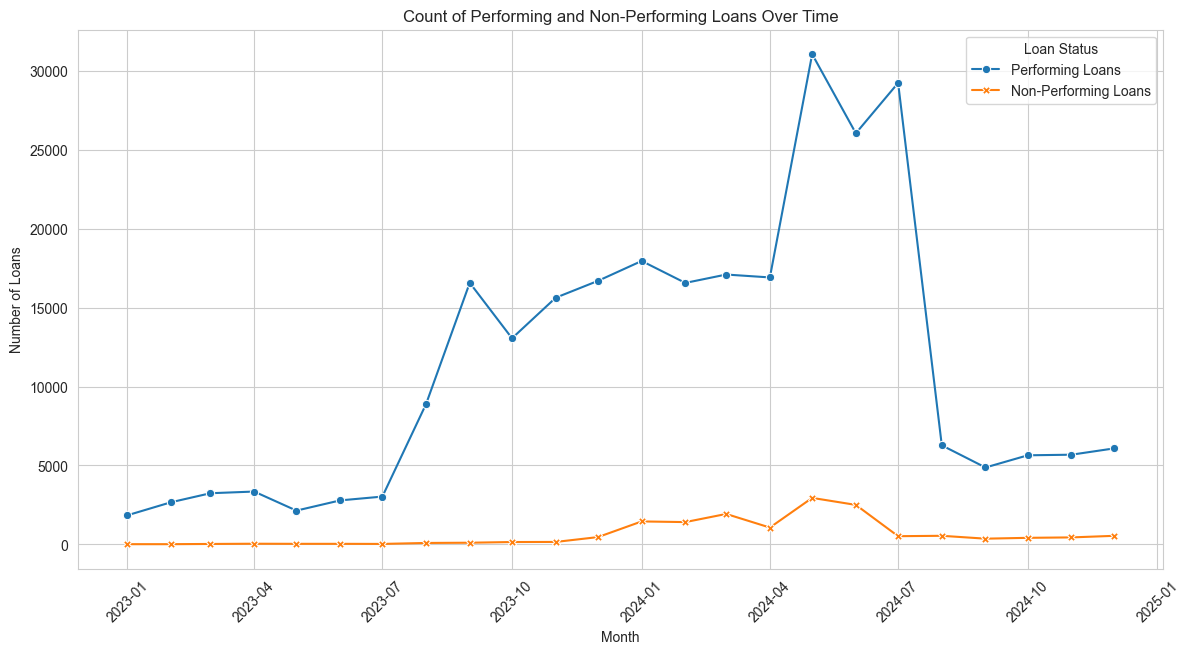

In [29]:
# Grouping data by month and NPL status
npl_counts = df.groupby([df['created_month'], 'is_npl']).size().unstack().fillna(0)

# Renaming the columns for better readability
npl_counts.columns = ['Performing Loans', 'Non-Performing Loans']

# Convert the index to datetime objects for proper plotting
npl_counts.index = npl_counts.index.to_timestamp() # Use to_timestamp() to convert PeriodIndex to DateTimeIndex

# Plotting the count of Performing and Non-Performing Loans over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=npl_counts, markers=True, dashes=False)
plt.title('Count of Performing and Non-Performing Loans Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.grid(True)
plt.show()
#plt.savefig('monthly_npl_counts.png')

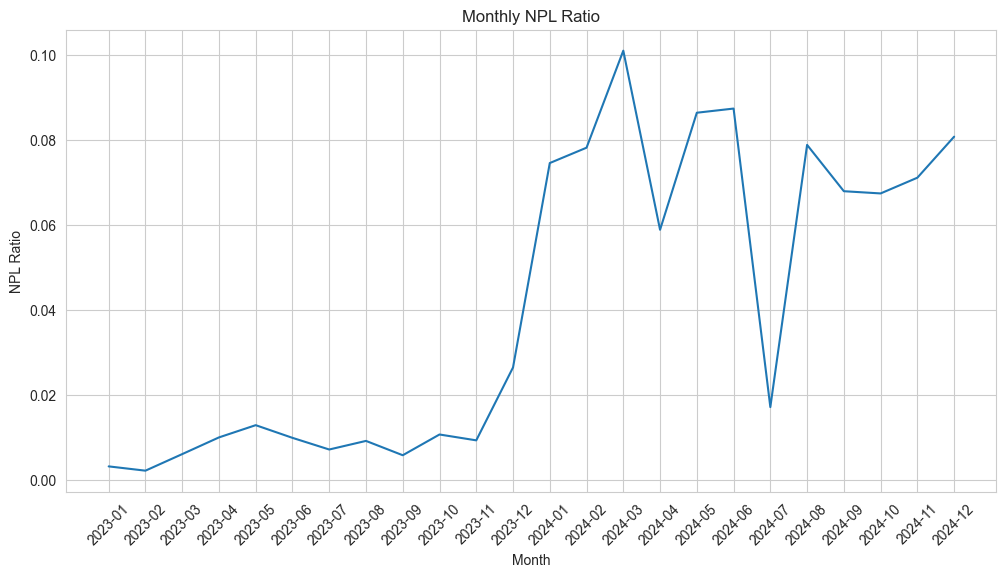

In [30]:
# Monthly NPL Ratio
monthly_npl = df.groupby(df['created_month'])['is_npl'].mean()

# NPL Ratio by Agent
npl_by_agent = df.groupby('agent_id')['is_npl'].mean()

# Plotting the Monthly NPL Ratio
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_npl.index.astype(str), y=monthly_npl.values)
plt.title('Monthly NPL Ratio')
plt.xlabel('Month')
plt.ylabel('NPL Ratio')
plt.xticks(rotation=45)
plt.show()

# Save a copy of plot to local disk
#plt.savefig('monthly_npl_ratio.png')

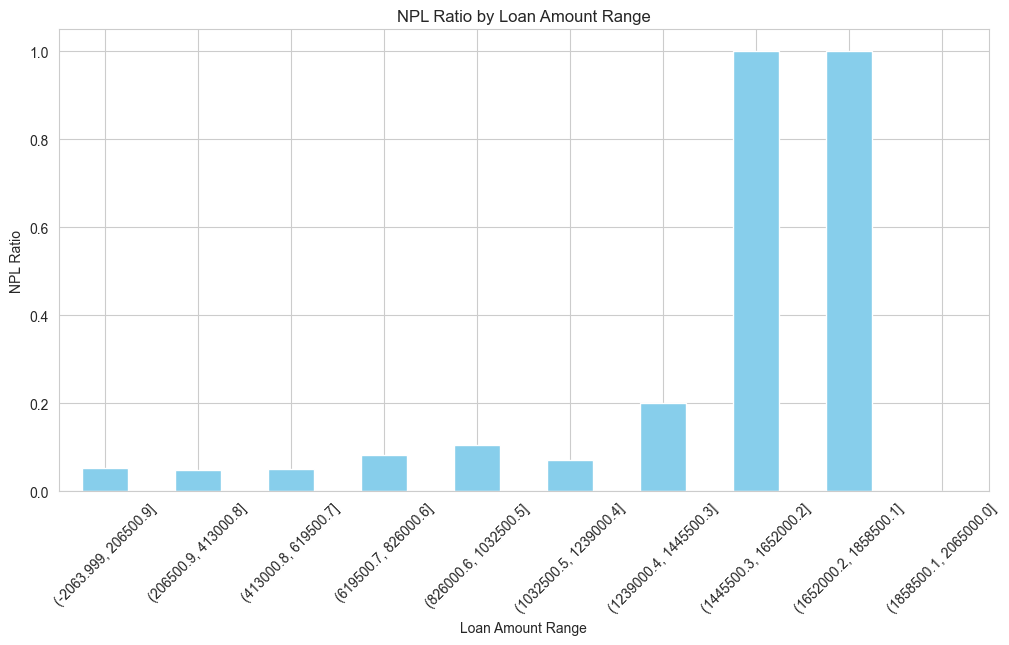

In [31]:
# Binning the loan amounts
df['loan_amount_bin'] = pd.cut(df['loan_amount'], bins=10)

# Calculating NPL ratio for each loan amount bin
npl_ratio_by_bin = df.groupby('loan_amount_bin')['is_npl'].mean()

# Plotting the NPL ratio by loan amount bin
plt.figure(figsize=(12, 6))
npl_ratio_by_bin.plot(kind='bar', color='skyblue')
plt.title('NPL Ratio by Loan Amount Range')
plt.xlabel('Loan Amount Range')
plt.ylabel('NPL Ratio')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#plt.savefig('npl_ratio_by_loan_amount.png')


#### Aging Analysis

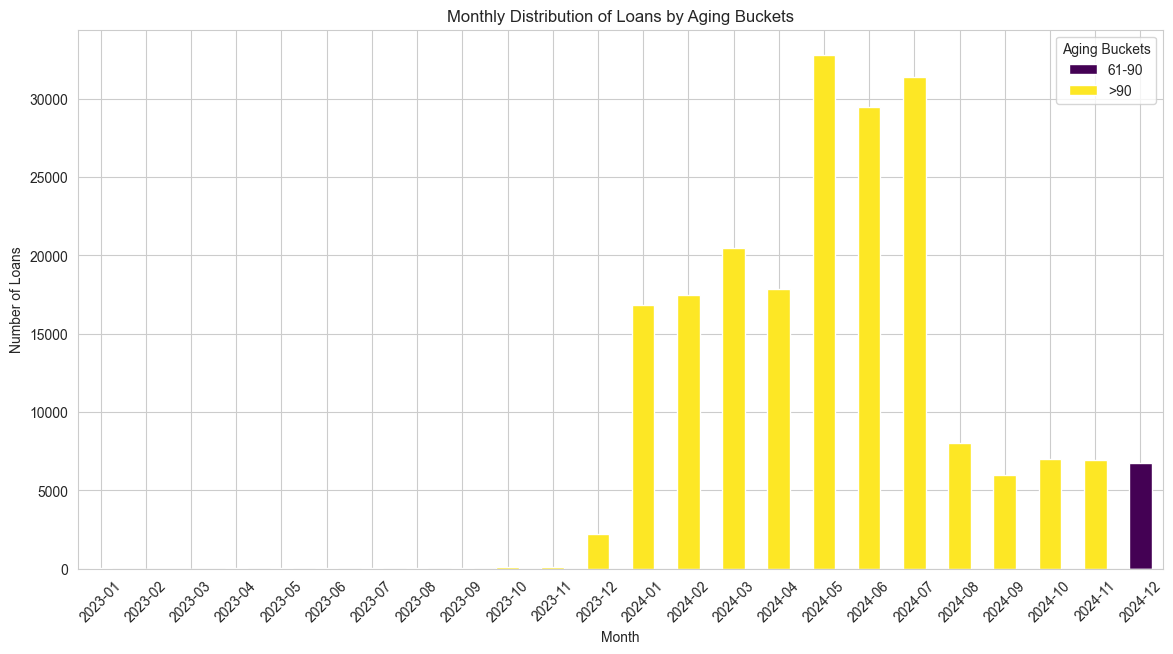

In [32]:
# Grouping by month and aging bucket
aging_distribution_monthly = df.groupby(['due_month', 'aging_bucket']).size().unstack().fillna(0)

# Plotting the stacked bar chart
aging_distribution_monthly.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')
plt.title('Monthly Distribution of Loans by Aging Buckets')
plt.xlabel('Month')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)
plt.legend(title='Aging Buckets')
plt.grid(True)
plt.show()

#plt.savefig('monthly_aging_distribution.png')

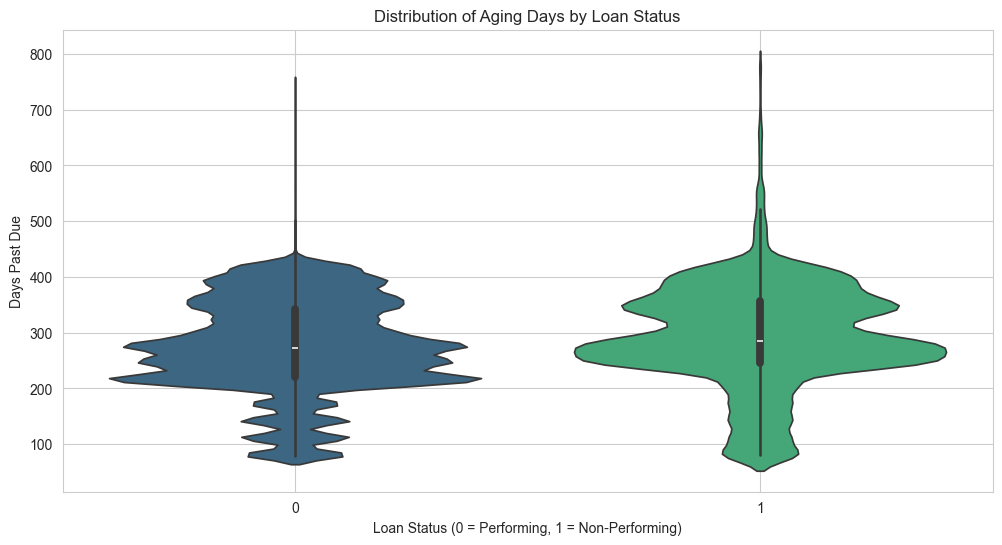

In [33]:
# Plotting Violin Plot of Aging Days by Loan Status
plt.figure(figsize=(12, 6))
sns.violinplot(x='is_npl', y='days_past_due', data=df, palette='viridis')
plt.title('Distribution of Aging Days by Loan Status')
plt.xlabel('Loan Status (0 = Performing, 1 = Non-Performing)')
plt.ylabel('Days Past Due')
plt.grid(True)
plt.show()

#plt.savefig('aging_days_by_loan_status.png')

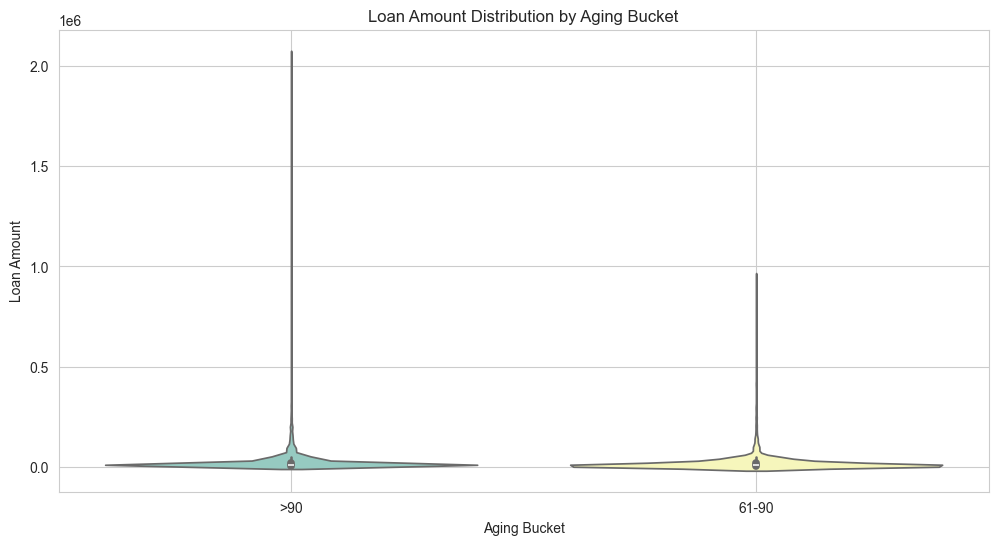

In [34]:
# Plotting Violin Plot of Loan Amount by Aging Bucket
plt.figure(figsize=(12, 6))
sns.violinplot(x='aging_bucket', y='loan_amount', data=df, palette='Set3')
plt.title('Loan Amount Distribution by Aging Bucket')
plt.xlabel('Aging Bucket')
plt.ylabel('Loan Amount')
plt.grid(True)
plt.show()

#plt.savefig('loan_amount_by_aging_bucket.png')

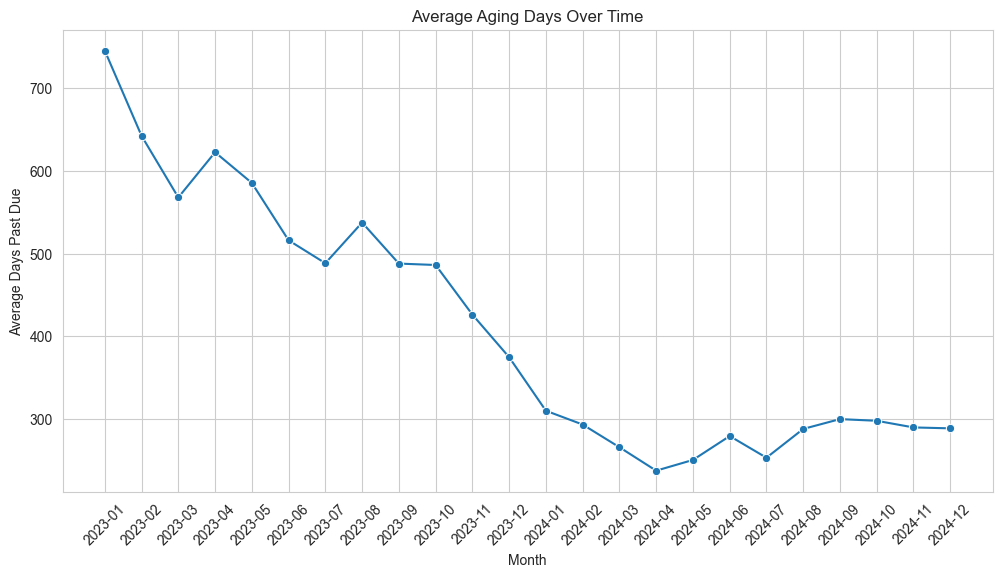

In [35]:
# Calculate the average days past due by created month
average_aging_days = df.groupby('created_month')['days_past_due'].mean()

# Plotting the average aging days over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=average_aging_days.index.astype(str), y=average_aging_days.values, marker='o')
plt.title('Average Aging Days Over Time')
plt.xlabel('Month')
plt.ylabel('Average Days Past Due')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#plt.savefig('average_aging_days_over_time.png')

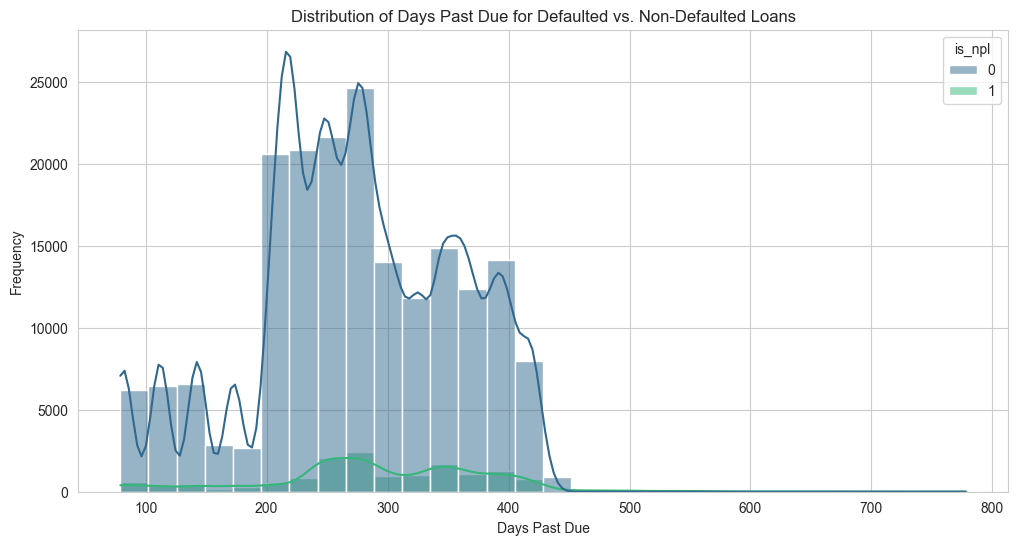

In [36]:
# Plotting Histogram of Days Past Due for Defaulted vs. Non-Defaulted Loans
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='days_past_due', hue='is_npl', kde=True, bins=30, palette='viridis')
plt.title('Distribution of Days Past Due for Defaulted vs. Non-Defaulted Loans')
plt.xlabel('Days Past Due')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#plt.savefig('days_past_due_distribution.png')

#### Collection Analysis

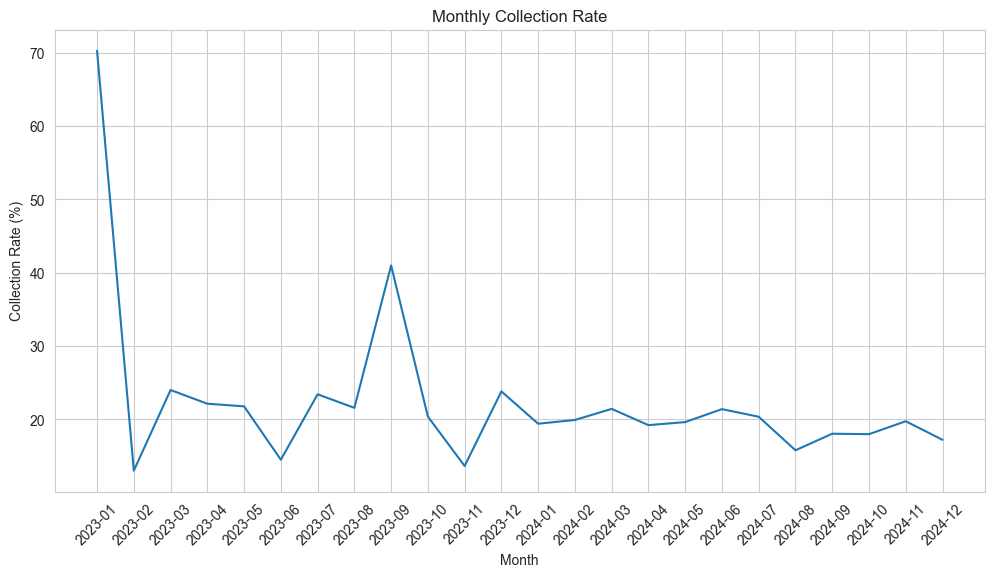

In [37]:
# Monthly Collection Rate
monthly_collection_rate = df.groupby(df['due_month'])['collection_rate'].mean()

# Plotting the Monthly Collection Rate
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_collection_rate.index.astype(str), y=monthly_collection_rate.values)
plt.title('Monthly Collection Rate')
plt.xlabel('Month')
plt.ylabel('Collection Rate (%)')
plt.xticks(rotation=45)
plt.show()

#plt.savefig('monthly_collection_rate.png')


In [38]:
# Calculate total revenue earned
total_revenue_earned = df['revenue_earned'].sum()

# Calculate total outstanding revenue
total_outstanding_revenue = df['outstanding_revenue'].sum()

# Output the results
print(f"Total Revenue Earned: ${total_revenue_earned:,.2f}")
print(f"Total Outstanding Revenue: ${total_outstanding_revenue:,.2f}")


Total Revenue Earned: $630,115,675.01
Total Outstanding Revenue: $694,260,464.73


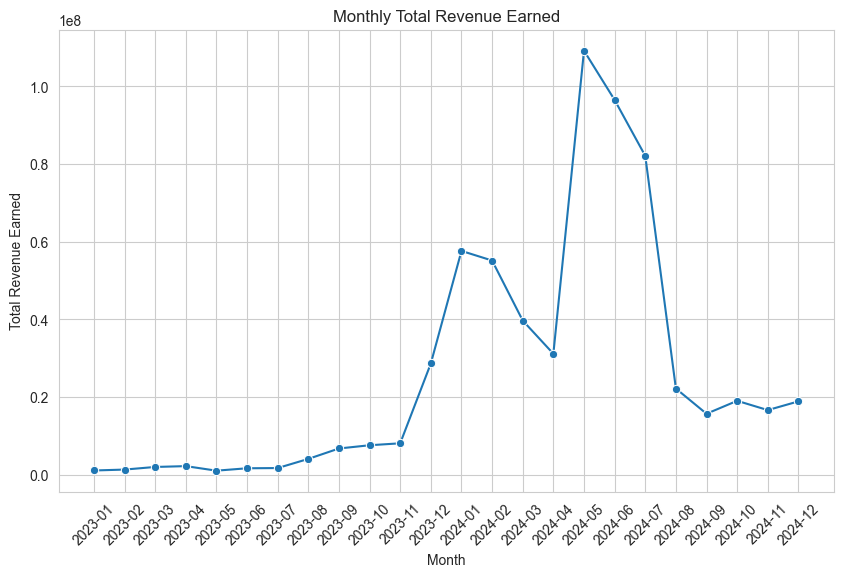

In [39]:
#Monthly Total Revenue Earned

# Grouping the data by month and summing the 'revenue_earned' for each month
monthly_revenue_earned = df.groupby('created_month')['revenue_earned'].sum()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_revenue_earned.index.astype(str), y=monthly_revenue_earned.values, marker='o')
plt.title('Monthly Total Revenue Earned')
plt.xlabel('Month')
plt.ylabel('Total Revenue Earned')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#plt.savefig('monthly_revenue_earned.png')


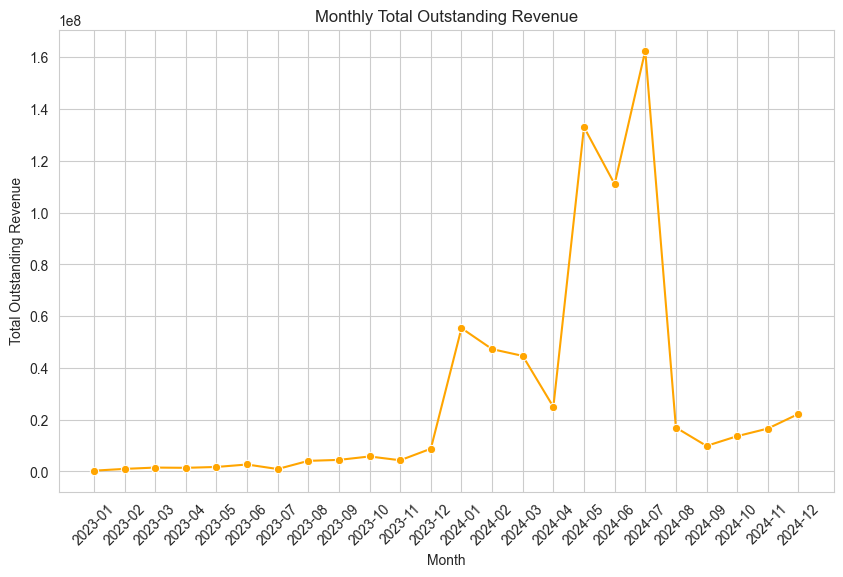

In [40]:
# Grouping the data by month and summing the 'outstanding_revenue' for each month
monthly_outstanding_revenue = df.groupby('created_month')['outstanding_revenue'].sum()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_outstanding_revenue.index.astype(str), y=monthly_outstanding_revenue.values, marker='o', color='orange')
plt.title('Monthly Total Outstanding Revenue')
plt.xlabel('Month')
plt.ylabel('Total Outstanding Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#plt.savefig('monthly_outstanding_revenue.png')


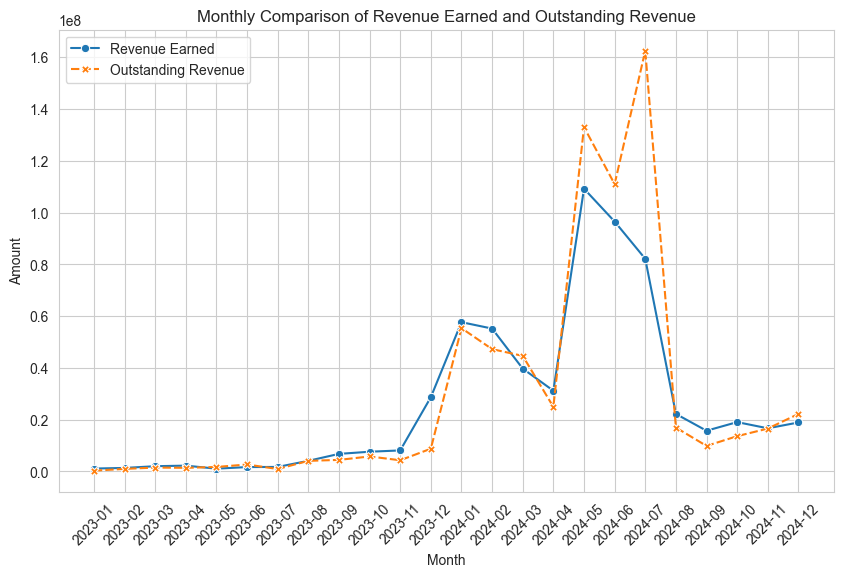

In [41]:
#Comparison between monthly outstanding and earned revenue

# Merging the two dataframes
monthly_revenue_comparison = pd.DataFrame({
    'Revenue Earned': monthly_revenue_earned,
    'Outstanding Revenue': monthly_outstanding_revenue
})

# Convert the index to string for plotting
monthly_revenue_comparison.index = monthly_revenue_comparison.index.astype(str)

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_revenue_comparison, markers=True)
plt.title('Monthly Comparison of Revenue Earned and Outstanding Revenue')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#plt.savefig('monthly_revenue_comparison.png')

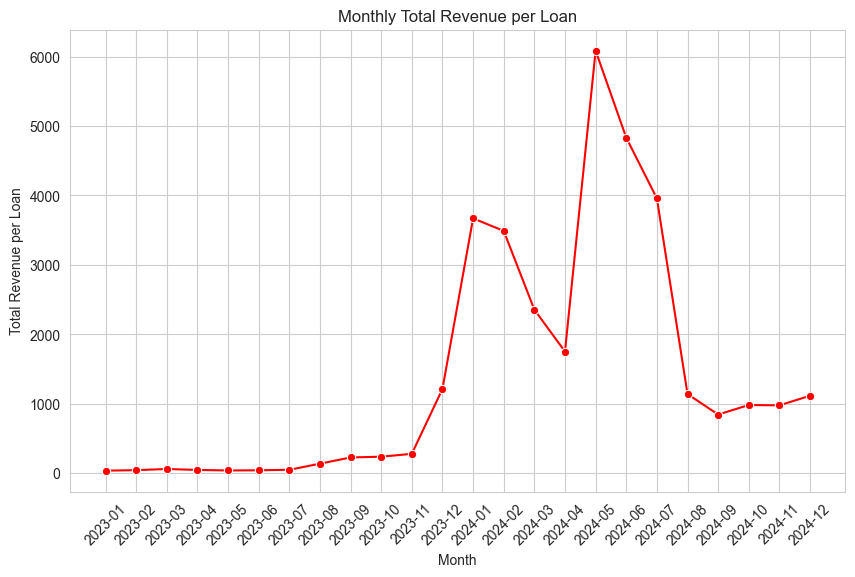

In [42]:
# Grouping the data by month and summing the 'revenue_per_loan' for each month
monthly_revenue_per_loan = df.groupby('created_month')['revenue_per_loan'].sum()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_revenue_per_loan.index.astype(str), y=monthly_revenue_per_loan.values, marker='o', color='red')
plt.title('Monthly Total Revenue per Loan')
plt.xlabel('Month')
plt.ylabel('Total Revenue per Loan')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#plt.savefig('monthly_revenue_per_loan.png')


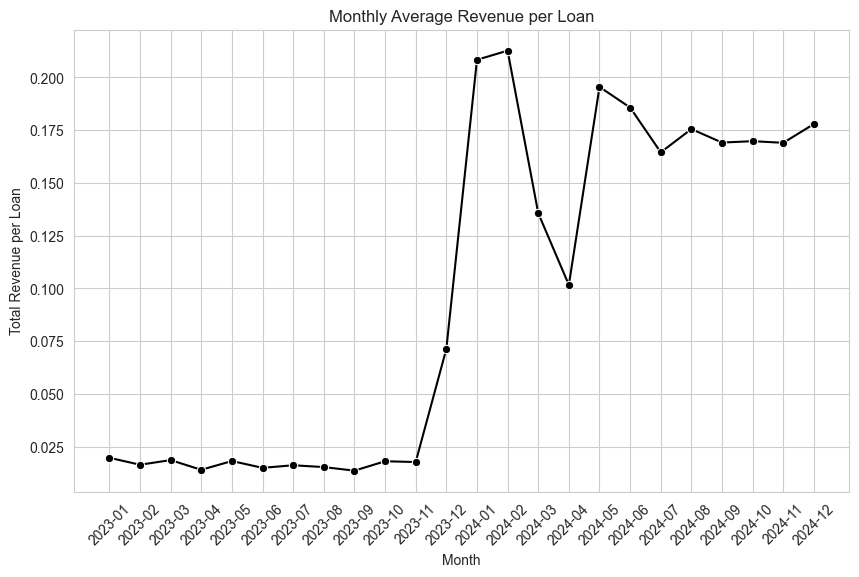

In [43]:
# Grouping the data by month and averaging the 'revenue_per_loan' for each month
monthly_revenue_per_loan_avg = df.groupby('created_month')['revenue_per_loan'].mean()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_revenue_per_loan_avg.index.astype(str), y=monthly_revenue_per_loan_avg.values, marker='o', color='black')
plt.title('Monthly Average Revenue per Loan')
plt.xlabel('Month')
plt.ylabel('Total Revenue per Loan')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#plt.savefig('monthly_revenue_per_loan_avg.png')

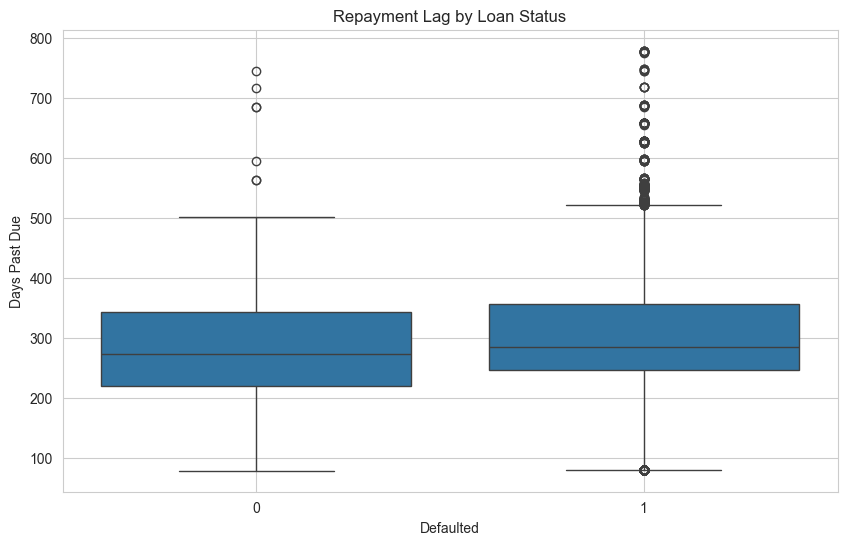

In [44]:
# Plotting repayment lag by loan status
plt.figure(figsize=(10, 6))
sns.boxplot(x='defaulted', y='days_past_due', data=df)
plt.title('Repayment Lag by Loan Status')
plt.xlabel('Defaulted')
plt.ylabel('Days Past Due')
plt.grid(True)
plt.show()

#plt.savefig('repayment_lag_by_loan_status.png')


#### Loan Quality Analysis

In [45]:
df['loan_amount'].describe()

count    2.884460e+05
mean     2.394264e+04
std      5.840495e+04
min      1.000000e+00
25%      3.500000e+03
50%      9.946000e+03
75%      2.250000e+04
max      2.065000e+06
Name: loan_amount, dtype: float64

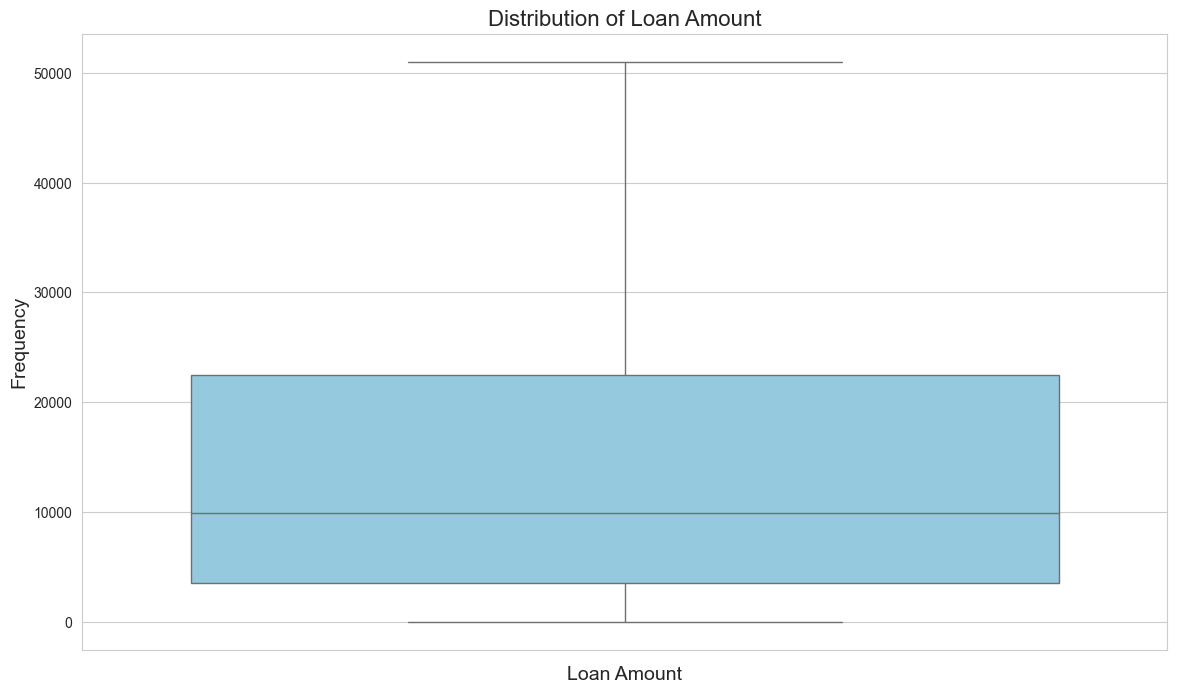

In [46]:
# Loan Amount Distribution

# Set the plot style for better aesthetics
sns.set_style('whitegrid')

# Create a figure and axis
plt.figure(figsize=(14, 8))

# Plot the histogram with a KDE plot
sns.boxplot(df['loan_amount'], color='skyblue', showfliers=False)
#sns.kdeplot(df['loan_amount'], color='orange', shade=True)

# Add titles and labels
plt.title('Distribution of Loan Amount', fontsize=16)
plt.xlabel('Loan Amount', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

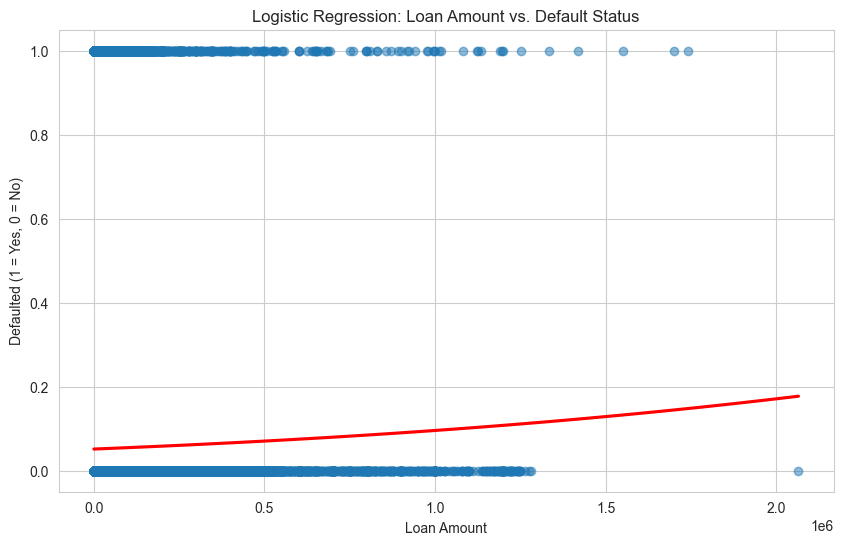

In [47]:
# Plotting logistic regression
plt.figure(figsize=(10, 6))
sns.regplot(x='loan_amount', y='is_npl', data=df, logistic=True, ci=None, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})

plt.title('Logistic Regression: Loan Amount vs. Default Status')
plt.xlabel('Loan Amount')
plt.ylabel('Defaulted (1 = Yes, 0 = No)')
plt.grid(True)
plt.show()


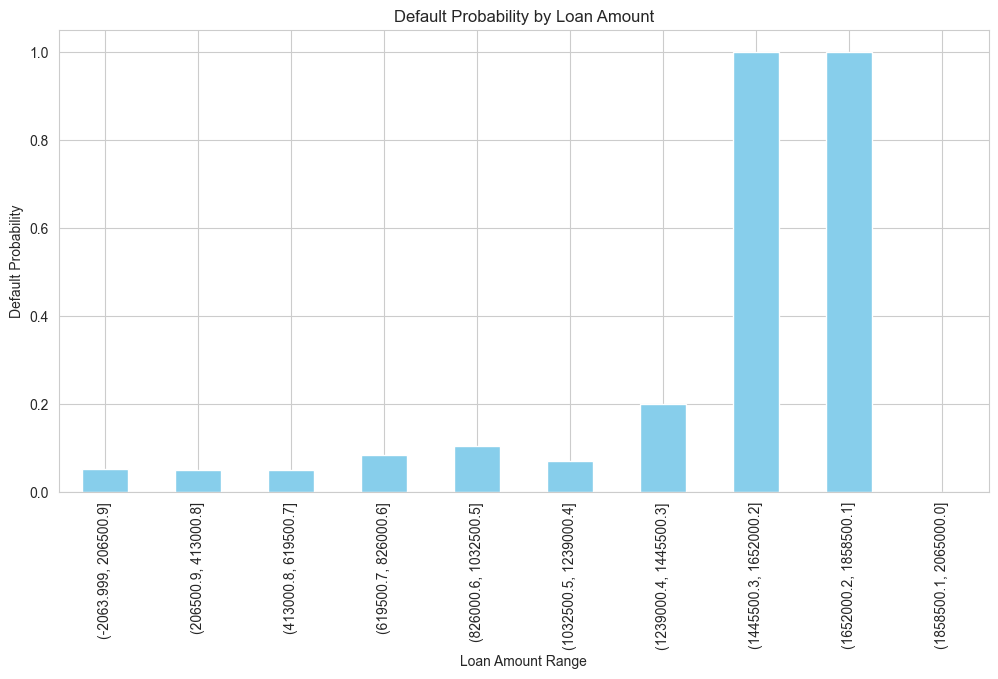

In [48]:
# Default Probability by Loan Amount
default_probability = df.groupby(pd.cut(df['loan_amount'], bins=10))['is_npl'].mean()

# Plotting Default Probability by Loan Amount
plt.figure(figsize=(12, 6))
default_probability.plot(kind='bar', color='skyblue')
plt.title('Default Probability by Loan Amount')
plt.xlabel('Loan Amount Range')
plt.ylabel('Default Probability')
plt.show()

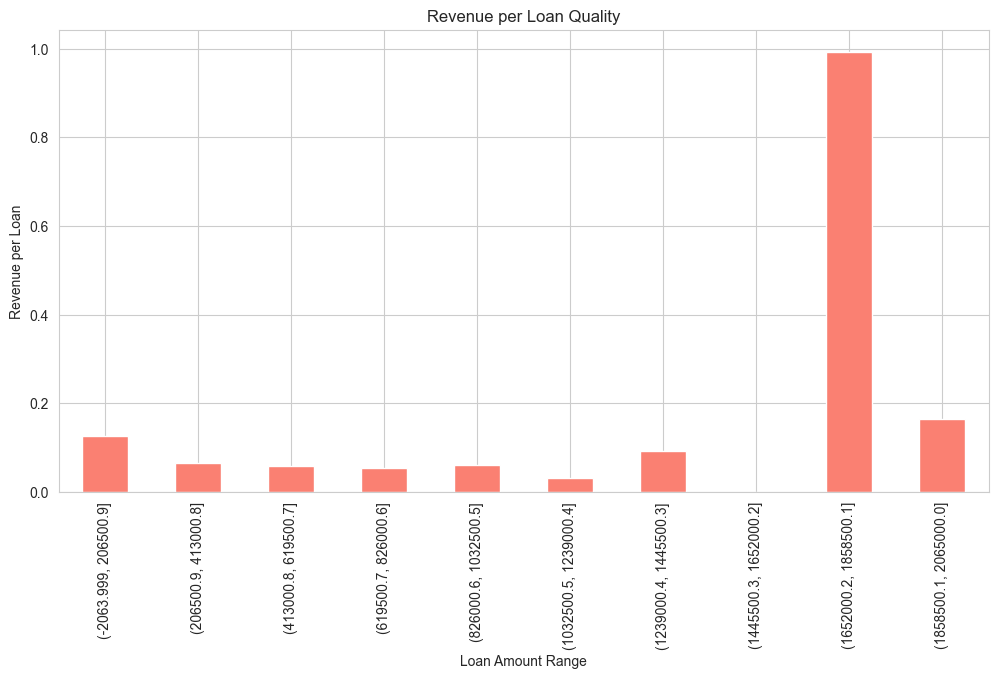

In [49]:
# Revenue per Loan Quality
loan_quality_revenue = df.groupby(pd.cut(df['loan_amount'], bins=10))['revenue_per_loan'].mean()

# Plotting Revenue per Loan Quality
plt.figure(figsize=(12, 6))
loan_quality_revenue.plot(kind='bar', color='salmon')
plt.title('Revenue per Loan Quality')
plt.xlabel('Loan Amount Range')
plt.ylabel('Revenue per Loan')
plt.show()


## KEY INSIGHTS

**NPL Insights**

- Overall NPL ratio for the entire duration was 5.24%
- Monthly NPL ratio varied across the duration with a minimum of 0% and a maximum of 10% (in March 2024).
- The NPL ratio by loan amount range plot illustrates that:
for loan amounts less that 12,390 NPL ratio is =< 10%
for loan amounts in the range of 123,900 - 144,550 the NPL ratio is 20%
for loan amounts above 144,550 the NPL ratio is 100%

**Aging Insights**

- The trends for loan aging as illustrated by the plot is as follows:

| DaysOverdue | Influential duration | Trend |
|-------------|----------------------|----------|
| 0-30        | Jul 24 - Date        | Spike then decrease|
| 31-60	      | Jun 24 - Jul 24      | Increase     |
| 61-90       | May 24 - Jun 24      | Increase     |
| >90         | Dec 23 - May24       | Steady sharp rise     |


- Distribution of aging days for non-performing loans indicates a multimodal trend with peaks at approximately 90 and 150 days respectively.
- Average aging days for loans decreased steadily over the 2023 calendar year and this trend became relatively steady at approximately 100 days in the 2024 calendar year.

**Collection Insights**

- Total revenue expected for the duration of the program was 1,324,376,139.74 units; of which 630,115,675.01 units(47.6%) was collected and 694,260,464.73 units(52.4%) is outstanding (yet to be received).
- It is also observed that outstanding revenue trailed revenue collected except during the period spanning April and August 2024, after which the aforementioned trend was re-established.
- There was also a considerable spike in revenue (both collected and outstanding) in the duration spanning April and August 2024.
- The highest monthly total revenue collected was approx. 6000 units (in April 2024)
- Revenue per loan was relatively steady with an average of approx 0.02 between Jan and Oct 2023. Thereafter monthly revenue per loan spiked to and fluctuated during Nov 2023 to April 2024 reaching a maximum of 0.2. This period of fluctuation was then followed up by a period of relatively steady preformance averaging approximately 0.175 from April 2024 to date.


**Loan Quality Insights**

- A total of 288,446 loans were disbursed over the duration of the program/project.
- Loan Amount metrics:

  Average Loan Amount- 23,942.64

  Max Amount Disbursed- 2,065,000 units

  50% of the loanees borrowed between 3,500 and 22,500 units.
- There is a near 100% default probability for loan amounts exceeding 144,550 units.

## RECOMMENDATIONS

* For loan amounts that exceed 144,550 units; extra scrutiny should be applied to applicants to minimize the risk of default, because, at this range the analysis of client behaviour indicates a near 100% default rate.

* The analysis clearly highlights that more efforts should be applied towards the collections moving forward as there is still a large percentage of outstanding revenue yet to e collected for this project i.e. 694,260,464.73 units, which makes up 52.4% of total revenue expected.

* The measures applied during the 2024 calendar year should be maintained as they resulted in an increase in average revenue per loan, indicating that if maintained along with improved collection strategies, the project would generate quality revenue for majority of the loan amounts offered by the project.

### NEXT STEPS

Now that I have generate the relevant visualization according to the objectives, I can use the data to generate the following kinds of machine learning models:

1.) Loan Default Prediction (Binary Classification) - Predicting a loan will default  based on historical data

2.) Risk profile based client clustering (Unsupervised Learning) - Grouping clients into risk categories i.e. low, medium and high

3.) Early Warning Loan Default Detection (Time Series/ Sequential Modeling) - Generating a system to flag loans that are likey to default in near fufture

4.) Revenue prediction (Regression) - Predicting the total revenue a loan will generate over its lifetime

5.) Loan Performance Scoring (Ordinal Classification) - using features such as risk, revenue potential, repayment behaviour etc.


## CONCLUSION

In summary, the analysis reveals that while the overall NPL ratio is within acceptable limits, there are notable variations among loan segments. High-value loans and those in extended aging buckets demonstrate significant delays in repayment, underscoring the need for stricter lending criteria and targeted recovery strategies. These insights serve as a foundation for developing predictive models to flag potential defaults early and enhance overall financial health.